#### Alumno: Carabajal Jose Leonardo
Año: 2019


# Práctico 1: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar un sistema de recomendación basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

In [1]:
import surprise

surprise.__version__

'1.1.0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
artist_data = pd.read_csv("Last_fm_data/artists.dat", sep="\t")
artist_data.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


#### El anterior conjunto de datos nos muestra datos de los Artistas, tales como ID, el Nombre (NAME), la url donde encontrar musica del artista, y una url de una libreria de imagenes del artista.

In [4]:
user_artist_plays = pd.read_csv("Last_fm_data/user_artists.dat", sep="\t")
user_artist_plays.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


#### El anterior conjunto de datos nos muestra datos del detalle de que usuarios escucharon que artista y cuantas veces lo escucharon cada usuario, esta informacion es crucial para determinar que artista fue el mas elejido por los usuarios entre otras cosas. 

In [5]:
n_weight=len(user_artist_plays)
n_artist=len(artist_data)
n_users=user_artist_plays['userID'].nunique()

print(f"Cantidad de calificaciones: {n_weight}")
print(f"Cantidad de artistas: {n_artist}")
print(f"Cantidad de usuarios: {n_users}")
print(f"Promedio de calificaciones por usuario: {round(n_weight/n_users, 2)}")
print(f"Promedio de calificaciones por artista: {round(n_weight/n_artist, 2)}")

Cantidad de calificaciones: 92834
Cantidad de artistas: 17632
Cantidad de usuarios: 1892
Promedio de calificaciones por usuario: 49.07
Promedio de calificaciones por artista: 5.27


## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

In [6]:
df_analisis = pd.merge(user_artist_plays, artist_data, left_on='artistID', right_on='id')
df_analisis

,userID,artistID,weight,id,name,url,pictureURL
0,2,51,13883,51,Duran Duran,http://www.last.fm/music/Duran+Duran,http://userserve-ak.last.fm/serve/252/155668.jpg
1,4,51,228,51,Duran Duran,http://www.last.fm/music/Duran+Duran,http://userserve-ak.last.fm/serve/252/155668.jpg
2,27,51,85,51,Duran Duran,http://www.last.fm/music/Duran+Duran,http://userserve-ak.last.fm/serve/252/155668.jpg
3,28,51,10,51,Duran Duran,http://www.last.fm/music/Duran+Duran,http://userserve-ak.last.fm/serve/252/155668.jpg
4,62,51,528,51,Duran Duran,http://www.last.fm/music/Duran+Duran,http://userserve-ak.last.fm/serve/252/155668.jpg
...,...,...,...,...,...,...,...
92829,2100,18726,337,18726,Nyktalgia,http://www.last.fm/music/Nyktalgia,http://userserve-ak.last.fm/serve/252/49060167...
92830,2100,18727,297,18727,Atsakau niekadA,http://www.last.fm/music/Atsakau++niekadA,http://userserve-ak.last.fm/serve/252/29862435...
92831,2100,18728,281,18728,Domantas Razauskas,http://www.last.fm/music/Domantas+Razauskas,http://userserve-ak.last.fm/serve/252/165556.jpg
92832,2100,18729,280,18729,Atalyja,http://www.last.fm/music/Atalyja,http://userserve-ak.last.fm/serve/252/98093.jpg


In [7]:
df_analisis.describe()

,userID,artistID,weight,id
count,92834.000000,92834.000000,92834.00000,92834.000000
mean,1037.010481,3331.123145,745.24393,3331.123145
std,610.870436,4383.590502,3751.32208,4383.590502
min,2.000000,1.000000,1.00000,1.000000
25%,502.000000,436.000000,107.00000,436.000000
50%,1029.000000,1246.000000,260.00000,1246.000000
75%,1568.000000,4350.000000,614.00000,4350.000000
max,2100.000000,18745.000000,352698.00000,18745.000000


In [8]:
df_analisis[['userID','artistID','name']].groupby(['artistID','name']).count().sort_values('userID', ascending=[False]).head(10)

,,userID
artistID,name,
89,Lady Gaga,611
289,Britney Spears,522
288,Rihanna,484
227,The Beatles,480
300,Katy Perry,473
67,Madonna,429
333,Avril Lavigne,417
292,Christina Aguilera,407
190,Muse,400


#### ¿Cuáles son los artistas que fueron más escuchados? 
La query anterior nos trae el top 10 de artistas mas escuchados por diferentes usuarios.

In [9]:
df_analisis_por_peso = df_analisis[['artistID','weight']].groupby(['artistID']).sum()

In [10]:
df_analisis_por_peso = df_analisis_por_peso.reset_index()

In [11]:
df_analisis_por_peso.head(50).sort_values('weight', ascending=[False]).head(10)

,artistID,weight
49,55,449292
45,51,348919
6,7,96201
47,53,44230
27,30,38949
39,45,29358
46,52,18787
48,54,15927
23,25,15166
34,39,13816


#### ¿Cuáles son los artistas que fueron más escuchados? La query anterior nos trae el top 10 de artistas mas escuchados por peso.

### Normalización de los Pesos

#### Se normalizan los pesos, ya que va a permitir tener mejor la relación de tiempo escucha de cada usuario con los artistas escuchados

In [12]:
#Total de Peso por User

df_analisis_tot = df_analisis[['userID','weight']].groupby(['userID']).sum()
df_analisis_tot = df_analisis_tot.reset_index()
df_analisis_tot = df_analisis_tot.rename(columns={'weight':'tot_weight'})
df_analisis_tot.head()

,userID,tot_weight
0,2,168737
1,3,20501
2,4,26930
3,5,13159
4,6,1011


In [13]:
df_analisis_mean = df_analisis[['userID','weight']].groupby(['userID']).mean()
df_analisis_mean.head()

,weight
userID,
2,3374.74
3,410.02
4,538.60
5,263.18
6,20.22


In [14]:
df_analisis_norm = pd.merge(df_analisis,df_analisis_tot,how='inner',on=['userID'])
df_analisis_norm['norm_weight'] = df_analisis_norm['weight']/df_analisis_norm['tot_weight']
df_analisis_norm.head()

,userID,artistID,weight,id,name,url,pictureURL,tot_weight,norm_weight
0,2,51,13883,51,Duran Duran,http://www.last.fm/music/Duran+Duran,http://userserve-ak.last.fm/serve/252/155668.jpg,168737,0.082276
1,2,52,11690,52,Morcheeba,http://www.last.fm/music/Morcheeba,http://userserve-ak.last.fm/serve/252/46005111...,168737,0.069279
2,2,53,11351,53,Air,http://www.last.fm/music/Air,http://userserve-ak.last.fm/serve/252/251119.jpg,168737,0.067270
3,2,54,10300,54,Hooverphonic,http://www.last.fm/music/Hooverphonic,http://userserve-ak.last.fm/serve/252/40553471...,168737,0.061042
4,2,55,8983,55,Kylie Minogue,http://www.last.fm/music/Kylie+Minogue,http://userserve-ak.last.fm/serve/252/12740835...,168737,0.053237


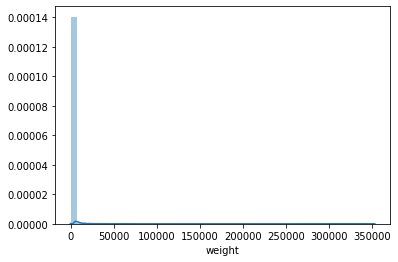

In [15]:
dist_list_x_user_nn = df_analisis_norm[['userID','weight']]
dist_list_x_user_nn

sns.distplot(dist_list_x_user_nn.weight)

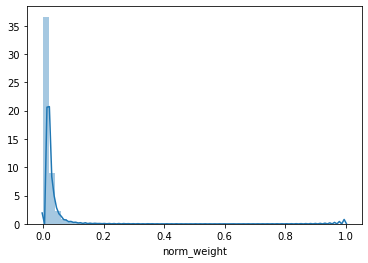

In [16]:
dist_list_x_user_norm = df_analisis_norm[['userID','norm_weight']]
dist_list_x_user_norm

sns.distplot(dist_list_x_user_norm.norm_weight)

#### ¿Cómo es la distribución de cantidad de listens por user? La Distribución del total de listens por user se calcula a continuación.

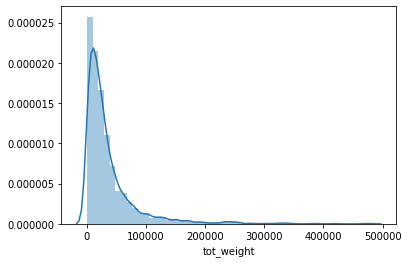

In [17]:
dist_list_x_user = df_analisis_tot[['userID','tot_weight']]
dist_list_x_user

sns.distplot(dist_list_x_user.tot_weight)

In [18]:
df_analisis_norm.groupby(['artistID','name']).sum().sort_values(by=['weight','tot_weight','norm_weight'], ascending=False)[['userID','weight','tot_weight','norm_weight']].head(10)

,,userID,weight,tot_weight,norm_weight
artistID,name,,,,
289,Britney Spears,536585,2393140,25481529,43.272625
72,Depeche Mode,282739,1301308,9448566,27.453508
89,Lady Gaga,621257,1291387,27416932,30.240944
292,Christina Aguilera,397259,1058405,20936405,18.217974
498,Paramore,416630,963449,18495951,13.677426
67,Madonna,424473,921198,21828237,18.346709
288,Rihanna,493104,905423,23300391,17.972141
701,Shakira,312770,688529,16145370,8.434474
227,The Beatles,516563,662116,16403627,19.922865


#### A continuacion los Artistas menos escuchados:

In [19]:
df_top10_artist = df_analisis.groupby(['artistID','name']).sum()[['weight']].sort_values(by=['weight'], ascending=False)
df_top10_artist.head(10)

,,weight
artistID,name,
289,Britney Spears,2393140
72,Depeche Mode,1301308
89,Lady Gaga,1291387
292,Christina Aguilera,1058405
498,Paramore,963449
67,Madonna,921198
288,Rihanna,905423
701,Shakira,688529
227,The Beatles,662116


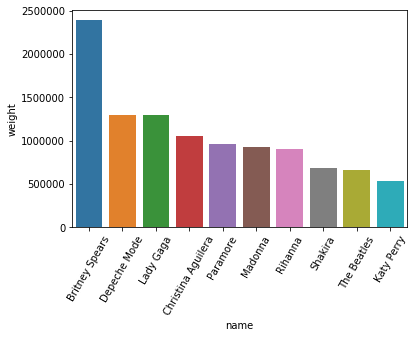

In [20]:
top10_artist_plot = df_top10_artist.head(10).reset_index().drop(columns=['artistID'])

sns.barplot(x="name", y="weight", data=top10_artist_plot)
plt.xticks(rotation=60)
plt.show()

#### Cantidad de listens por User

In [21]:
df_listen_user = df_analisis.groupby(['userID']).mean()[['weight']].sort_values(by=['weight'], ascending=False)
df_listen_user.head(10)

,weight
userID,
1307,34328.000000
542,19033.714286
757,9600.780000
2000,9368.180000
1418,8326.980000
1642,7765.020000
1094,7582.500000
1942,6970.540000
2071,6768.000000


In [22]:
df_listen_user_sum= df_analisis.groupby(['userID']).sum()[['weight']].sort_values(by=['weight'], ascending=False)
df_listen_user_sum.head(10)

,weight
userID,
757,480039
2000,468409
1418,416349
1642,388251
1094,379125
1942,348527
2071,338400
2031,329980
514,329782


#### ¿Es posible ver el género más escuchado? Generos mas escuchados

In [23]:
generos_list = pd.read_csv("Last_fm_data/tags.dat", sep="\t", encoding='latin-1')
generos_list.head()

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


In [24]:
generos = pd.read_csv("Last_fm_data//user_taggedartists.dat", sep="\t")
generos.head()

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


In [25]:
df_generos_analisis = pd.merge(generos,generos_list)
df_generos_analisis

,userID,artistID,tagID,day,month,year,tagValue
0,2,52,13,1,4,2009,chillout
1,2,63,13,1,4,2009,chillout
2,2,73,13,1,4,2009,chillout
3,2,94,13,1,4,2009,chillout
4,2,6177,13,1,5,2009,chillout
...,...,...,...,...,...,...,...
186474,2096,1124,6027,1,8,2010,20th century classical
186475,2096,7932,12645,6,5,2011,symbiosis
186476,2096,8438,12645,1,8,2010,symbiosis
186477,2096,13890,12645,1,9,2010,symbiosis


In [26]:
df_generos_analisis.groupby(['tagID','tagValue']).count().sort_values(by=['userID'], ascending=False)

,,userID,artistID,day,month,year
tagID,tagValue,,,,,
73,rock,7503,7503,7503,7503,7503
24,pop,5418,5418,5418,5418,5418
79,alternative,5251,5251,5251,5251,5251
18,electronic,4672,4672,4672,4672,4672
81,indie,4458,4458,4458,4458,4458
...,...,...,...,...,...,...
7452,finding your way,1,1,1,1,1
7451,divorce,1,1,1,1,1
7450,soulmate,1,1,1,1,1


## Ejercicio 2 - Matriz de Usuario-Contenido

En este ejercicio, a partir del conjunto de datos, deberán generar una matriz de usuario-contenido. Tengan en cuenta que los ratings, en este caso, son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a cierto artista.

In [27]:
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from surprise import Dataset, Reader, KNNWithMeans
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate, train_test_split

In [28]:
matriz = df_analisis[['userID','artistID','weight']]
matriz

,userID,artistID,weight
0,2,51,13883
1,4,51,228
2,27,51,85
3,28,51,10
4,62,51,528
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [29]:
#reader = Reader(matriz_scale=(matriz.weight.min(), matriz.weight.max()))
reader = Reader(rating_scale=(matriz.weight.min(), matriz.weight.max()))

matriz = Dataset.load_from_df(matriz[["userID", "artistID", "weight"]], reader)

In [30]:
matriz

## Ejercicio 3 - Entrenamiento del algoritmo de recomendación

Utilizando las herramientas brindadas por Surpr!se, entrenen varios modelos de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo.

Si necesitan inspiración, les recomiendo revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).

In [31]:
matriz_train, matriz_test = train_test_split(matriz, test_size=0.3)
model = KNNWithMeans(k=20).fit(matriz_train)
predictions = model.test(matriz_test)
print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE on test: 4483.0415


In [32]:
model = KNNWithMeans(k=5, verbose=False)
cross_validated_metrics = cross_validate(model, matriz, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3489.42493735.69263325.31555500.98034906.28594191.5398857.5084
MAE (testset)     800.3084791.8666792.8336862.5964821.3845813.797926.6131 
Fit time          0.51    0.51    0.51    0.51    0.56    0.52    0.02    
Test time         1.14    1.19    1.15    1.14    1.15    1.16    0.02    


## NORMALIZADO Ejercicio 2 - Matriz de Usuario-Contenido

En este caso, debido a los resultados anteriores que nos dan un RMSE de 3451,1002, un número inaceptable, realizamos la matriz con valores normalizados en la métrica del peso o cantidad de listens de cada usuario (cantidad de veces que un usuario escuchó a cierto artista.)

In [33]:
matriz_norm = df_analisis_norm[['userID','artistID','norm_weight']]
matriz_norm

,userID,artistID,norm_weight
0,2,51,0.082276
1,2,52,0.069279
2,2,53,0.067270
3,2,54,0.061042
4,2,55,0.053237
...,...,...,...
92829,1893,17465,0.250000
92830,1893,17466,0.250000
92831,1893,17467,0.250000
92832,1893,17468,0.250000


In [34]:
#reader = Reader(matriz_scale=(matriz.weight.min(), matriz.weight.max()))
reader_norm = Reader(rating_scale=(matriz_norm.norm_weight.min(), matriz_norm.norm_weight.max()))

matriz_norm = Dataset.load_from_df(matriz_norm[["userID", "artistID", "norm_weight"]], reader_norm)

In [35]:
matriz_norm

## NORMALIZADO Ejercicio 3 - Entrenamiento del algoritmo de recomendación

Utilizando las herramientas brindadas por Surpr!se, entrenen varios modelos de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo.

Si necesitan inspiración, les recomiendo revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).

In [36]:
norm_matriz_train, norm_matriz_test = train_test_split(matriz_norm, test_size=0.3)
norm_model = KNNWithMeans(k=20).fit(norm_matriz_train)
norm_predictions = norm_model.test(norm_matriz_test)
print("RMSE on test: {:.4f}".format(rmse(norm_predictions, verbose=False)))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE on test: 0.0380


In [37]:
norm_model = KNNWithMeans(k=5, verbose=False)
norm_cross_validated_metrics = cross_validate(norm_model, matriz_norm, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0387  0.0385  0.0417  0.0420  0.0410  0.0404  0.0015  
MAE (testset)     0.0170  0.0169  0.0173  0.0169  0.0170  0.0170  0.0002  
Fit time          0.56    0.59    0.55    0.56    0.52    0.56    0.02    
Test time         1.19    1.54    1.15    1.15    1.19    1.24    0.15    


In [38]:
matriz_norm

## Ejercicio 4 - Sistema de recomendación

A partir del mejor modelo de recomendación que hayan sugerido en el caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares.

La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

In [39]:
artist_map = artist_data[['id','name']].rename(columns={'id':'artistID'})
artist_map.head()

,artistID,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


In [40]:
_df_recsystem = df_analisis_norm[['userID','artistID','norm_weight']]
_df_recsystem.head()

,userID,artistID,norm_weight
0,2,51,0.082276
1,2,52,0.069279
2,2,53,0.067270
3,2,54,0.061042
4,2,55,0.053237


In [47]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userID'].nunique()
    N = df['artistID'].nunique()

    user_mapper = dict(zip(np.unique(df["userID"]), list(range(M))))
    artist_mapper = dict(zip(np.unique(df["artistID"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userID"])))
    artist_inv_mapper = dict(zip(list(range(N)), np.unique(df["artistID"])))
    
    user_index = [user_mapper[i] for i in df['userID']]
    item_index = [artist_mapper[i] for i in df['artistID']]

    X = csr_matrix((df["norm_weight"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper

X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper = create_X(_df_recsystem)

#### Las querys anteriores nos sirven para armar un mapeo de artistas para el modelo de sistema de recomendacion de Artistas

### Sistema de Recomendacion

In [49]:
from sklearn.neighbors import NearestNeighbors

def find_similar_artists(artist_id, X, artist_mapper, artist_inv_mapper, k, metric='cosine'):
  
    X = X.T
    neighbour_ids = []
    
    artist_ind = artist_mapper[artist_id]
    artist_vec = X[artist_ind]
    if isinstance(artist_vec, (np.ndarray)):
        artist_vec = artist_vec.reshape(1,-1)
    # use k+1 since kNN output includes the artistID of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(artist_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(artist_inv_mapper[n])
    neighbour_ids.pop(0)
    
    return neighbour_ids

In [51]:
#Se define K=20 por que fue el modelo que en el ejercicio anterior nos dió RSME más bajo
artistas_a_recomendar = find_similar_artists(62, X, artist_mapper, artist_inv_mapper, k=20)
artistas_a_recomendar

[7676,
 7673,
 7672,
 7671,
 7670,
 7669,
 7664,
 7666,
 7668,
 7662,
 7674,
 7675,
 7667,
 5428,
 6785,
 7661,
 7663,
 446,
 2639]

#### La funcion anterior nos encuentra los k-nearest neighbours segun el id de un artista cuando lo recibe por parametro pasandole el Nombre de un Artista.

In [58]:
artist_titles_name = dict(zip(artist_map['name'], artist_map['artistID']))

In [59]:
print (artist_titles_name)

{'MALICE MIZER': 1, 'Diary of Dreams': 2, 'Carpathian Forest': 3, 'Moi dix Mois': 4, 'Bella Morte': 5, 'Moonspell': 6, 'Marilyn Manson': 7, 'DIR EN GREY': 8, 'Combichrist': 9, 'Grendel': 10, 'Agonoize': 11, 'Behemoth': 12, 'Hocico': 13, 'Dimmu Borgir': 15, 'London After Midnight': 16, 'Psyclon Nine': 17, 'The Crüxshadows': 18, ':wumpscut:': 19, 'Limbonic Art': 20, 'Artista sconosciuto': 21, 'xotox': 22, 'The Kovenant': 23, 'Feindflug': 24, 'Cradle of Filth': 25, 'Tamtrum': 26, 'Laibach': 27, 'Gorgoroth': 28, 'And One': 30, 'Amduscia': 31, 'Covenant': 32, 'Icon of Coil': 34, 'KMFDM': 36, 'Funker Vogt': 37, 'Dawn of Ashes': 38, 'Sopor Aeternus & The Ensemble of Shadows': 39, 'The Faint': 40, 'God Module': 41, 'Noisuf-X': 43, 'Das Ich': 44, 'Mindless Self Indulgence': 45, 'Pyotr Ilyich Tchaikovsky': 46, 'Emperor': 47, 'Anorexia Nervosa': 48, 'Reaper': 49, 'Gothminister': 50, 'Duran Duran': 51, 'Morcheeba': 52, 'Air': 53, 'Hooverphonic': 54, 'Kylie Minogue': 55, 'Daft Punk': 56, 'Thievery 

In [61]:
def find_similar_artists_name(artist_name, X, artist_mapper, artist_inv_mapper, k, metric='cosine'):

    X = X.T
    neighbour_ids = []
    artists_output = []
    
    artist_id = artist_titles_name[artist_name]
    artist_ind = artist_mapper[artist_id] 
    artist_vec = X[artist_ind]
    if isinstance(artist_vec, (np.ndarray)):
        artist_vec = artist_vec.reshape(1,-1)
    # use k+1 since kNN output includes the artistID of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(artist_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(artist_inv_mapper[n])
        
    neighbour_ids.pop(0)
    
    for i in neighbour_ids:
        artists_output.append(artist_titles[i])
    artists_output.pop(0)
    
    return artists_output

### Probamos el Sistema de Recomendacion creado anteriormente

In [69]:
artist_titles = dict(zip(artist_map['artistID'], artist_map['name']))

artist_id = 62

similar_artists = find_similar_artists(artist_id, X, artist_mapper, artist_inv_mapper, k=20)
artist_title = artist_titles[artist_id]

print("Si te gusto {artist_title}, no te pierdas:")
for i in similar_artists:
    print(artist_titles[i])

Si te gusto {artist_title}, no te pierdas:
We Are Virgins
The Ruby Suns
Das Pop
Field Music
The Chills
Little Red
Ryan DeRobertis
Hungry Kids of Hungary
Wouter Hamel
The Cold Napoleons
Smith Westerns
Beulah
Tahiti 80
Jack Peñate
VHS or Beta
The Trash Can Sinatras
The Futureheads
Ra Ra Riot
Ben Folds Five


#### La funcion anterior hace lo mismo que la funcion find_similar_artists solo que esta en ves de devolvernos el ID de los artistas recomendados nos devuelve el nombre.

In [70]:
artist_titles_name['Coldplay'] ## Le pasamos por Parametro el nombre de un artista y nos devuelve su ID, el mismo se usara para la funcion anterior para que nos encuentre k-nearest neighbours

65

#### Otra Prueba  por nombre usando la funcion find_similar_artists_name

In [71]:
artistas_a_recomendar = find_similar_artists_name('Coldplay', X, artist_mapper, artist_inv_mapper, k=20)
artistas_a_recomendar

['Steve Angello',
 'Alemão Ronaldo',
 'The Killers',
 'Keane',
 'Stephen Warbeck',
 'Radiohead',
 'Kings of Leon',
 'Muse',
 'Poslednja igra leptira',
 'Foo Fighters',
 'Snow Patrol',
 'Oasis',
 'Paramore',
 'Billie the Vision & The Dancers',
 'Ray LaMontagne',
 'Gorillaz',
 'Travis',
 'Jack Johnson']